# Capstone project data science: comparison of Houston and Denver neighborhoods

The first part of this assignment relates to scraping a wikipedia page for neighborhoods in Toronto. 

Step 1: Import necessary packages

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

Step 2: Request the webpage contents using the 'request' package

In [3]:
URL = 'https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods'
page = requests.get(URL)

Step 3: Use 'BeautifulSoup' to parse the html into a BeautifulSoup object

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')

Step 5: Locate on the page the information of interest by inspecting the page in a web browser. In this case we want the information contained in a wikitable. We can use our BeautifulSoup object to isolate that table.

In [5]:
myTable = soup.find('table',{'class':'wikitable'})

Step 6: The table can be read into a pandas dataframe with the 'read_html' command by casting 'myTable' to a string. The first index [0] contains the dataframe. The procedure can be performed in one line of code:

In [6]:
df = pd.read_html(str(myTable))[0]
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,#,Name,Location relative to Downtown Houston,Approximate boundaries
0,1,Willowbrook,Northwest,Along Texas State Highway 249 northwest of Bel...
1,2,Greater Greenspoint,North,Around the junction of Beltway 8 and Interstat...
2,3,Carverdale,Northwest,South of the junction of Beltway 8 and U.S. Ro...
3,4,Fairbanks / Northwest Crossing,Northwest,Along U.S. Route 290 between Interstate 610 an...
4,5,Greater Inwood,Northwest,North of Fairbanks / Northwest Crossing and ea...


Step 7: Per the instructions, we do not want to analyze rows with 'Not assigned' Boroughs. We can filter those rows out and reset the index with the .reset_index method.

In [7]:
df_filt=df.drop(['Approximate boundaries', 'Location relative to Downtown Houston', '#'], axis=1)
print('The number of rows in my dataframe before cleaning are {}'.format(df_filt.shape[0]))

num = len(df_filt['Name'])
for n in range(0,num):
    #Uses a regular expression to remove text in parenthesis
    df_filt['Name'][n]=re.sub("[\(\[].*?[\)\]]", '', df_filt['Name'][n])
    
    #If a neighborhood has a '/' there are actually multiple neighborhoods listed.
    #This set of nested loops will split off the later neighborhoods and append
    #them to the bottom of the dataframe
    if '/' in df_filt['Name'][n]:
        strList = df_filt['Name'][n].split('/')
        df_filt['Name'][n]=strList[0]
        for n in range(1, len(strList)):
            df_temp = pd.DataFrame([strList[n]],columns=['Name'])
            df_filt=df_filt.append(df_temp)

print('The number of rows in my dataframe after cleaning are {}'.format(df_filt.shape[0]))
df_filt.head(20)


The number of rows in my dataframe before cleaning are 88
The number of rows in my dataframe after cleaning are 113


,Name
0,Willowbrook
1,Greater Greenspoint
2,Carverdale
3,Fairbanks
4,Greater Inwood
5,Acres Home
6,Hidden Valley
7,Westbranch
8,Addicks
9,Spring Branch West


In [8]:
df_filt['Name'][14]='Houston Heights'
df_filt.head(20)

,Name
0,Willowbrook
1,Greater Greenspoint
2,Carverdale
3,Fairbanks
4,Greater Inwood
5,Acres Home
6,Hidden Valley
7,Westbranch
8,Addicks
9,Spring Branch West


Per the assignment instructions I am replacing 'Not assigned' Neighborhoods with the Borough, but in this case you can run the commented out code and use the .unique() method or run the check_neighborhood lines and verify that there are no 'Not assigned' neighborhoods in this case. We can continue on.

Step 9: Print the number of rows using .shape:

In [9]:
print('The number of rows in my dataframe are {}'.format(df_filt.shape[0]))

The number of rows in my dataframe are 113


In [10]:
den = pd.read_csv('denver_neighborhoods.csv')
den.head()

,NBHD_ID,NBHD_NAME,TYPOLOGY,NOTES
0,2,Auraria,None,None
1,21,Cory - Merrill,None,None
2,7,Belcaro,None,None
3,70,Washington Park,None,None
4,71,Washington Park West,None,None


In [11]:
den_filt=den.drop(['NBHD_ID', 'TYPOLOGY', 'NOTES'], axis=1)
print(den_filt.shape)
den_filt.head()

(78, 1)


,NBHD_NAME
0,Auraria
1,Cory - Merrill
2,Belcaro
3,Washington Park
4,Washington Park West


In [12]:
den_filt.rename(columns={'NBHD_NAME':'Neighborhood'}, inplace=True)
df_filt.rename(columns ={'Name':'Neighborhood'}, inplace=True)
print(den_filt.head())
print(df_filt.head())

           Neighborhood
0               Auraria
1        Cory - Merrill
2               Belcaro
3       Washington Park
4  Washington Park West
          Neighborhood
0          Willowbrook
1  Greater Greenspoint
2           Carverdale
3           Fairbanks 
4       Greater Inwood


In [13]:
den_filt['City']='Denver'
den_filt['State']='CO'
df_filt['City']='Houston'
df_filt['State']='TX'
print(den_filt.head())
print(df_filt.head())

           Neighborhood    City State
0               Auraria  Denver    CO
1        Cory - Merrill  Denver    CO
2               Belcaro  Denver    CO
3       Washington Park  Denver    CO
4  Washington Park West  Denver    CO
          Neighborhood     City State
0          Willowbrook  Houston    TX
1  Greater Greenspoint  Houston    TX
2           Carverdale  Houston    TX
3           Fairbanks   Houston    TX
4       Greater Inwood  Houston    TX


In [14]:
df_comb=[]
df_comb=df_filt.append(den_filt).reset_index(drop=True)

In [15]:
df_comb

,Neighborhood,City,State
0,Willowbrook,Houston,TX
1,Greater Greenspoint,Houston,TX
2,Carverdale,Houston,TX
3,Fairbanks,Houston,TX
4,Greater Inwood,Houston,TX
...,...,...,...
186,Whittier,Denver,CO
187,Cole,Denver,CO
188,Westwood,Denver,CO
189,Sunnyside,Denver,CO


In [16]:
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
import math
import matplotlib.pyplot as plt

For readability and ease, I have created two functions. The get_coord function takes in an address and user_agent and returns the lat/lon values. The add_markers function takes in our processed dataframe of neighborhoods and an empty folium map object and adds the neighborhoods to the map.

In [17]:
def get_coord(address, usr_agent, verbose=True):
    try:
        geolocator = Nominatim(user_agent=usr_agent)
        location = geolocator.geocode(address)
        if verbose == True:
            print('Successfully located {}'.format(address))
        return location.latitude, location.longitude
    except:
        if verbose == True:
            print('Was unable to locate {}'.format(address))
        return

def add_markers(df, city, state, folium_map, verbose = True):
    city_lat, city_lng = get_coord(city + ', ' + state, '_explorer', verbose)
    for neighborhood, df_city in zip(df['Neighborhood'],df['City']):
        if city == df_city:
            try:
                lat, lng = get_coord(neighborhood+', '+city+', '+state, '_explorer', verbose)
                distance = dist((city_lat, city_lng), (lat, lng))
                if distance > 50:
                    if verbose == True:
                        print('Located wrong lat/lon for {}'.format(neighborhood))
                    continue
                label = neighborhood
                label = folium.Popup(label, parse_html=True)
                folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(folium_map)
            except:
                if verbose == True:
                    print('Whoops! Got nothing for ',neighborhood)
    return folium_map

def dist(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

Next, I create the map of Toronto with neighborhoods:

In [18]:
#Generate Houston map
latitude, longitude = get_coord('Houston, TX', '_explorer')               #Get lat/lon
map_ho = folium.Map(location=[latitude, longitude], zoom_start=10) #Create map object
map_ho = add_markers(df_comb,'Houston', 'TX', map_ho)                          #Add markers to map
map_ho


Successfully located Houston, TX
Successfully located Houston, TX
Successfully located Willowbrook, Houston, TX
Successfully located Greater Greenspoint, Houston, TX
Successfully located Carverdale, Houston, TX
Successfully located Fairbanks , Houston, TX
Successfully located Greater Inwood, Houston, TX
Was unable to locate Greater Inwood, Houston, TX
Whoops! Got nothing for  Greater Inwood
Successfully located Acres Home, Houston, TX
Successfully located Hidden Valley, Houston, TX
Located wrong lat/lon for Hidden Valley
Successfully located Westbranch, Houston, TX
Successfully located Addicks , Houston, TX
Successfully located Spring Branch West, Houston, TX
Successfully located Langwood, Houston, TX
Successfully located Central Northwest , Houston, TX
Located wrong lat/lon for Central Northwest 
Successfully located Independence Heights, Houston, TX
Successfully located Lazybrook , Houston, TX
Successfully located Houston Heights, Houston, TX
Successfully located Memorial, Houston, T

In [19]:
#Generate Denver map
latitude, longitude = get_coord('Denver, CO', '_explorer')               #Get lat/lon
map_de = folium.Map(location=[latitude, longitude], zoom_start=10) #Create map object
map_de = add_markers(df_comb,'Denver', 'CO', map_de)                          #Add markers to map
map_de

Successfully located Denver, CO
Successfully located Denver, CO
Successfully located Auraria, Denver, CO
Successfully located Cory - Merrill, Denver, CO
Was unable to locate Cory - Merrill, Denver, CO
Whoops! Got nothing for  Cory - Merrill
Successfully located Belcaro, Denver, CO
Successfully located Washington Park, Denver, CO
Successfully located Washington Park West, Denver, CO
Successfully located Speer, Denver, CO
Successfully located Cherry Creek, Denver, CO
Successfully located Country Club, Denver, CO
Located wrong lat/lon for Country Club
Successfully located Congress Park, Denver, CO
Successfully located City Park, Denver, CO
Successfully located Marston, Denver, CO
Successfully located Fort Logan, Denver, CO
Located wrong lat/lon for Fort Logan
Successfully located Washington Virginia Vale, Denver, CO
Was unable to locate Washington Virginia Vale, Denver, CO
Whoops! Got nothing for  Washington Virginia Vale
Successfully located Barnum, Denver, CO
Successfully located Barnum

I load in the getNearbyVenues function from the lab assignment, but I have added credentials as one of the inputs. I explain more on that below.

In [20]:
def getNearbyVenues(credentials, LIMIT, df, radius=2500):
    CLIENT_ID, CLIENT_SECRET, VERSION = credentials.split(',')
    
    venues_list=[]
    for name, city, state in zip(df['Neighborhood'],df['City'],df['State']):
        city_lat, city_lng = get_coord(city+', '+state, '_explorer', verbose = False)
        try:
            lat, lng = get_coord(name+', '+ city +', '+state,'_explorer')
            distance = dist((city_lat, city_lng), (lat,lng))
            if distance > 50:
                print('Got wrong lat/lon for {}'.format(neighborhood))
                continue
        except:
            print('Whoops! Something went wrong with',name)
            continue
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


Here I decided to keep a 'foursquare_credentials.txt' file in my working directory with the CLIENT_ID, CLIENT_SECRET, and VERSION. This way I can freely share and version control my scripts without including sensitive information. The text file should simply contain YOUR_CLIENT_ID,YOUR_CLIENT_SECRET,VERSION separated by commas. If you don't want to make this file you can comment this out and uncomment the other code and replace the variables with your information.

In [23]:
with open('foursquare_credentials.txt') as cred:
        credentials = cred.read()

Here I call the getNearbyVenues function and output some basic information about the results, same as we did in the lab.

In [24]:
LIMIT = 100
venues = getNearbyVenues(credentials, LIMIT,
                               df_comb
                              )

print('Venues: {}'.format(venues.shape))
print(venues.groupby('Neighborhood').count())
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

Successfully located Willowbrook, Houston, TX
Successfully located Greater Greenspoint, Houston, TX
Successfully located Carverdale, Houston, TX
Successfully located Fairbanks , Houston, TX
Successfully located Greater Inwood, Houston, TX
Was unable to locate Greater Inwood, Houston, TX
Whoops! Something went wrong with Greater Inwood
Successfully located Acres Home, Houston, TX
Successfully located Hidden Valley, Houston, TX
Whoops! Something went wrong with Hidden Valley
Successfully located Westbranch, Houston, TX
Successfully located Addicks , Houston, TX
Successfully located Spring Branch West, Houston, TX
Successfully located Langwood, Houston, TX
Successfully located Central Northwest , Houston, TX
Whoops! Something went wrong with Central Northwest 
Successfully located Independence Heights, Houston, TX
Successfully located Lazybrook , Houston, TX
Successfully located Houston Heights, Houston, TX
Successfully located Memorial, Houston, TX
Successfully located Eldridge , Houston

Successfully located Marston, Denver, CO
Successfully located Fort Logan, Denver, CO
Whoops! Something went wrong with Fort Logan
Successfully located Washington Virginia Vale, Denver, CO
Was unable to locate Washington Virginia Vale, Denver, CO
Whoops! Something went wrong with Washington Virginia Vale
Successfully located Barnum, Denver, CO
Successfully located Barnum West, Denver, CO
Successfully located West Colfax, Denver, CO
Successfully located West Highland, Denver, CO
Successfully located Sloan Lake, Denver, CO
Successfully located Berkeley, Denver, CO
Successfully located Regis, Denver, CO
Successfully located Chaffee Park, Denver, CO
Successfully located Highland, Denver, CO
Successfully located Athmar Park, Denver, CO
Successfully located Wellshire, Denver, CO
Successfully located University, Denver, CO
Successfully located Rosedale, Denver, CO
Successfully located Cheesman Park, Denver, CO
Successfully located Hilltop, Denver, CO
Successfully located Montclair, Denver, CO


Next, I load up the functions we used in the lab to find the top venues and return the most common venues.

In [25]:
def find_top_venues(city_grouped, num_top_venues):
    for hood in city_grouped['Neighborhood']:
        print("----"+hood+"----")
        temp = city_grouped[city_grouped['Neighborhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now with the venues in hand we can convert our categorical variables into dummy binary variables with the pd.get_dummies function.

In [68]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot.to_csv('dummies_houston_denver.csv', index=False)
onehot

,Zoo Exhibit,ATM,Accessories Store,Adult Education Center,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,...,Volleyball Court,Warehouse,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12496,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12497,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
onehot['Neighborhood']

0        Willowbrook
1        Willowbrook
2        Willowbrook
3        Willowbrook
4        Willowbrook
            ...     
12494            DIA
12495            DIA
12496            DIA
12497            DIA
12498            DIA
Name: Neighborhood, Length: 12499, dtype: object

Now we want to add back in the neighborhoods to our dummy dataframe and analyze the dataframe for top venues. We will use these results to analyze the clusters later.

In [70]:
#Group by neighborhood
grouped = onehot.groupby('Neighborhood').mean().reset_index()

find_top_venues(grouped, 5)

#Find top 10 venues for each neighborhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)


---- Allendale----
            venue  freq
0  Discount Store  0.15
1     Pizza Place  0.08
2     Gas Station  0.08
3  Baseball Field  0.08
4            Park  0.08


---- Bellfort ----
                venue  freq
0  Mexican Restaurant  0.06
1          Donut Shop  0.04
2      Sandwich Place  0.04
3         Coffee Shop  0.03
4      Discount Store  0.03


---- Crestmont Park----
                 venue  freq
0       Discount Store  0.21
1          Gas Station  0.12
2          Pizza Place  0.12
3    Mobile Phone Shop  0.08
4  Fried Chicken Joint  0.08


---- Ellington----
                        venue  freq
0                 Gas Station  0.14
1        Fast Food Restaurant  0.14
2                      Museum  0.07
3               Military Base  0.07
4  Construction & Landscaping  0.07


---- Homestead----
          venue  freq
0         Hotel  0.11
1          Park  0.06
2           Bar  0.04
3    Steakhouse  0.03
4  Burger Joint  0.03


---- Houston----
          venue  freq
0         Hotel  

         venue  freq
0      Brewery  0.16
1  Coffee Shop  0.08
2          Bar  0.07
3  Pizza Place  0.05
4  Zoo Exhibit  0.04


----Congress Park----
                 venue  freq
0          Coffee Shop  0.08
1   Italian Restaurant  0.05
2          Zoo Exhibit  0.04
3  American Restaurant  0.04
4                 Park  0.04


----DIA----
                 venue  freq
0       Airport Lounge  0.09
1          Coffee Shop  0.09
2       Ice Cream Shop  0.06
3        Train Station  0.06
4  American Restaurant  0.06


----Denver Harbor ----
                  venue  freq
0    Mexican Restaurant  0.17
1           Gas Station  0.11
2        Sandwich Place  0.08
3  Fast Food Restaurant  0.08
4           Pizza Place  0.06


----Downtown----
         venue  freq
0        Hotel  0.11
1         Park  0.05
2      Brewery  0.04
3  Coffee Shop  0.04
4          Gym  0.04


----East Colfax----
                venue  freq
0         Coffee Shop  0.10
1                Park  0.06
2  Mexican Restaurant  0.05
3   

            venue  freq
0     Coffee Shop  0.09
1  Sandwich Place  0.08
2     Pizza Place  0.05
3            Park  0.05
4   Grocery Store  0.04


----North Capitol Hill----
                 venue  freq
0                Hotel  0.06
1  American Restaurant  0.06
2       Sandwich Place  0.05
3          Pizza Place  0.05
4          Coffee Shop  0.04


----North Park Hill----
                  venue  freq
0           Coffee Shop  0.09
1           Zoo Exhibit  0.06
2  Marijuana Dispensary  0.04
3               Brewery  0.03
4    Chinese Restaurant  0.03


----Northshore----
                  venue  freq
0    Mexican Restaurant  0.10
1  Fast Food Restaurant  0.07
2     Mobile Phone Shop  0.05
3           Pizza Place  0.05
4   American Restaurant  0.04


----Northside ----
                venue  freq
0  Mexican Restaurant  0.09
1        Cocktail Bar  0.07
2                 Bar  0.05
3         Coffee Shop  0.05
4                Park  0.04


----Overland----
                venue  freq
0  Mexican

           venue  freq
0  Grocery Store  0.05
1           Bank  0.05
2   Burger Joint  0.05
3    Coffee Shop  0.05
4           Park  0.03


----Windsor----
                 venue  freq
0                Hotel  0.10
1         Cocktail Bar  0.06
2              Brewery  0.04
3           Restaurant  0.04
4  American Restaurant  0.04




Now that we have the top venues for our neighborhoods, we can perform our cluster analysis. Below we perform the cluster analysis for 5 clusters and merge the results with the top neighborhood venues that we determined above. The merged dataframe is printed for review.

In [71]:
def run_kmeans(kclusters, grp):
    temp = grp.drop('Neighborhood', 1)
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(temp)
    return kmeans

def rerun_kmeans(kmeans, kclusters, grp_clust, nei_ven_sorted, bad_cluster):
    grp_clust.insert(0, 'Cluster Labels', kmeans.labels_)
    for n, cluster in enumerate(grp_clust['Cluster Labels']):
        if cluster == bad_cluster:
            print(n)
            print('Bad cluster',bad_cluster,'=',grp_clust['Cluster Labels'][n])
            grp_clust.drop(n, inplace=True)
            nei_ven_sorted.drop(n, inplace=True)
    grp_clust.drop('Cluster Labels',axis=1, inplace=True)
    kmeans = run_kmeans(kclusters, grp_clust)
    temp_grp = grp_clust.reset_index(drop=True)
    temp_nei = nei_ven_sorted.reset_index(drop=True)
    return kmeans, temp_grp, temp_nei

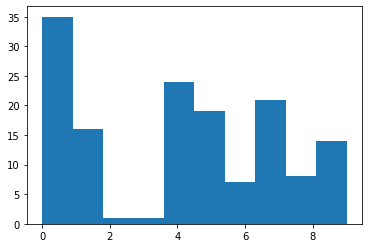

array([8, 0, 8, 0, 9, 9, 9, 6, 1, 4, 5, 0, 6, 2, 6, 5, 1, 4, 9, 4, 9, 1,
       0, 6, 9, 1, 0, 0, 7, 1, 7, 5, 5, 4, 7, 0, 0, 5, 1, 0, 9, 7, 4, 0,
       4, 4, 1, 4, 0, 7, 4, 4, 6, 9, 4, 8, 0, 0, 0, 7, 0, 7, 8, 8, 7, 5,
       0, 4, 0, 4, 5, 5, 5, 1, 7, 4, 4, 5, 1, 8, 0, 0, 5, 0, 1, 0, 5, 5,
       0, 5, 9, 4, 0, 9, 8, 5, 4, 1, 4, 5, 7, 7, 5, 3, 7, 6, 7, 7, 7, 9,
       8, 0, 4, 7, 6, 9, 4, 0, 1, 0, 0, 0, 0, 7, 1, 9, 9, 1, 1, 4, 0, 7,
       5, 4, 4, 4, 7, 7, 0, 0, 0, 5, 7, 0, 0, 1])

In [72]:
kclusters = 10
group_clusters=grouped
kmeans = run_kmeans(kclusters, group_clusters)
kmeans.labels_

plt.hist(kmeans.labels_, bins=10)
plt.show()
kmeans.labels_

0
Bad cluster 3 = 3
2
Bad cluster 3 = 3


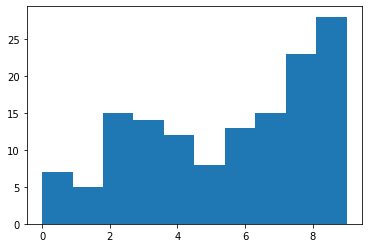

array([9, 6, 6, 6, 5, 7, 7, 8, 1, 8, 8, 7, 7, 6, 7, 6, 7, 9, 8, 6, 7, 9,
       9, 3, 4, 3, 8, 8, 7, 3, 9, 9, 8, 4, 9, 6, 3, 7, 9, 2, 2, 4, 2, 5,
       0, 2, 2, 8, 6, 2, 5, 1, 9, 9, 3, 9, 0, 5, 5, 0, 8, 1, 2, 7, 2, 8,
       8, 8, 4, 0, 7, 2, 8, 7, 5, 9, 1, 8, 9, 4, 9, 8, 8, 9, 8, 6, 2, 9,
       6, 5, 1, 2, 4, 2, 8, 3, 3, 8, 3, 8, 3, 3, 3, 4, 5, 9, 2, 3, 8, 6,
       2, 9, 4, 9, 9, 9, 7, 0, 4, 6, 6, 4, 4, 9, 9, 0, 8, 7, 7, 2, 3, 3,
       9, 9, 9, 8, 0, 9, 9, 4])

In [77]:
kmeans, group_clusters, neighborhoods_venues_sorted = rerun_kmeans(
            kmeans, kclusters, group_clusters, neighborhoods_venues_sorted, 3)

plt.hist(kmeans.labels_, bins=10)
plt.show()
kmeans.labels_

In [78]:
# add clustering labels
try:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    print('Already inserted Cluster Labels')
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9,Bellfort,Mexican Restaurant,Sandwich Place,Donut Shop,Fast Food Restaurant,BBQ Joint,Discount Store,Coffee Shop,Filipino Restaurant,Seafood Restaurant,Italian Restaurant
1,6,Homestead,Hotel,Park,Bar,Vietnamese Restaurant,Steakhouse,Fried Chicken Joint,Baseball Stadium,Coffee Shop,Burger Joint,Beer Bar
2,6,Houston,Hotel,Park,Concert Hall,Brewery,Gym,Coffee Shop,French Restaurant,Baseball Stadium,Steakhouse,Burger Joint
3,6,Houston Gardens,Hotel,Park,Concert Hall,Brewery,Gym,Coffee Shop,French Restaurant,Baseball Stadium,Steakhouse,Burger Joint
4,5,Manchester,Gas Station,Mexican Restaurant,Park,Harbor / Marina,Discount Store,Food Truck,Convenience Store,Pizza Place,Supermarket,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
135,8,Westwood,Mexican Restaurant,Vietnamese Restaurant,Convenience Store,Fast Food Restaurant,Grocery Store,Discount Store,Fried Chicken Joint,Burger Joint,Gas Station,Coffee Shop
136,0,Whittier,Brewery,Coffee Shop,Bar,Zoo Exhibit,American Restaurant,New American Restaurant,Café,Pizza Place,Breakfast Spot,Burger Joint
137,9,Willow Meadows,Burger Joint,Department Store,Coffee Shop,Mexican Restaurant,Breakfast Spot,Fast Food Restaurant,Furniture / Home Store,Donut Shop,Supermarket,Bank
138,9,Willowbrook,Burger Joint,Bank,Grocery Store,Coffee Shop,Department Store,Dive Bar,Supermarket,Fast Food Restaurant,Pizza Place,Video Store


In [79]:
# create a toronto_merged dataframe from our neighborhoods + lat/lon dataframe (new_df)
merged = df_comb

# merge toronto_grouped with toronto_merged to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

print(merged.head(20)) # Cluster analysis results merged with top venues

            Neighborhood     City State  Cluster Labels 1st Most Common Venue  \
0            Willowbrook  Houston    TX             9.0          Burger Joint   
1    Greater Greenspoint  Houston    TX             1.0                 Hotel   
2             Carverdale  Houston    TX             9.0            Donut Shop   
3             Fairbanks   Houston    TX             9.0         Deli / Bodega   
4         Greater Inwood  Houston    TX             NaN                   NaN   
5             Acres Home  Houston    TX             8.0    Mexican Restaurant   
6          Hidden Valley  Houston    TX             NaN                   NaN   
7             Westbranch  Houston    TX             9.0           Gas Station   
8               Addicks   Houston    TX             6.0                 Hotel   
9     Spring Branch West  Houston    TX             7.0    Mexican Restaurant   
10              Langwood  Houston    TX             1.0  Fast Food Restaurant   
11    Central Northwest   Ho

In [80]:
merged.dropna(inplace=True)
merged.head(20)

,Neighborhood,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Willowbrook,Houston,TX,9.0,Burger Joint,Bank,Grocery Store,Coffee Shop,Department Store,Dive Bar,Supermarket,Fast Food Restaurant,Pizza Place,Video Store
1,Greater Greenspoint,Houston,TX,1.0,Hotel,Fast Food Restaurant,Sandwich Place,Fried Chicken Joint,Pizza Place,Shoe Store,Seafood Restaurant,Discount Store,Department Store,Bank
2,Carverdale,Houston,TX,9.0,Donut Shop,BBQ Joint,Gas Station,Hotel,Convenience Store,Mexican Restaurant,Sandwich Place,Asian Restaurant,Fast Food Restaurant,Sports Bar
3,Fairbanks,Houston,TX,9.0,Deli / Bodega,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,BBQ Joint,Donut Shop,Clothing Store,Miscellaneous Shop,Mobile Phone Shop,Burger Joint
5,Acres Home,Houston,TX,8.0,Mexican Restaurant,Fast Food Restaurant,Gas Station,Park,Discount Store,Sandwich Place,Pizza Place,Beer Garden,Music Venue,Market
7,Westbranch,Houston,TX,9.0,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Burger Joint,Pizza Place,Mexican Restaurant,Taco Place,Video Store,Baseball Field,Gym
8,Addicks,Houston,TX,6.0,Hotel,Mexican Restaurant,Coffee Shop,Sandwich Place,Bank,Café,Hotel Bar,Bar,American Restaurant,Furniture / Home Store
9,Spring Branch West,Houston,TX,7.0,Mexican Restaurant,Korean Restaurant,Cosmetics Shop,Burger Joint,Seafood Restaurant,Steakhouse,Furniture / Home Store,Italian Restaurant,Shopping Mall,Sandwich Place
10,Langwood,Houston,TX,1.0,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,Hotel,Pizza Place,Discount Store,Dive Bar,Grocery Store,Bank,Fried Chicken Joint
12,Independence Heights,Houston,TX,8.0,Fast Food Restaurant,Mobile Phone Shop,Fried Chicken Joint,Discount Store,Mexican Restaurant,Gas Station,Furniture / Home Store,BBQ Joint,American Restaurant,Chinese Restaurant


Here we will create the map and add markers with colors indicating each cluster.

In [105]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for neighborhood, city, cluster, state in zip(merged['Neighborhood'], merged['City'], merged['Cluster Labels'], merged['State']):
    city_lat, city_lon = get_coord(city+', '+state, '_explorer', verbose=False)
    try:
        lat, lon = get_coord(neighborhood+', '+city+', '+state,'_explorer')
        distance = dist((city_lat, city_lon), (lat, lon))
        if distance > 50:
            print('Got wrong lat/lon for {}'.format(neighborhood))
            continue
    except:
        continue
    if np.isnan(cluster):
        continue
    label = folium.Popup(str(neighborhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        default_open=True,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)


Successfully located Willowbrook, Houston, TX
Successfully located Greater Greenspoint, Houston, TX
Successfully located Carverdale, Houston, TX
Successfully located Fairbanks , Houston, TX
Successfully located Acres Home, Houston, TX
Successfully located Westbranch, Houston, TX
Successfully located Addicks , Houston, TX
Successfully located Spring Branch West, Houston, TX
Successfully located Langwood, Houston, TX
Successfully located Independence Heights, Houston, TX
Successfully located Lazybrook , Houston, TX
Successfully located Houston Heights, Houston, TX
Successfully located Memorial, Houston, TX
Successfully located Eldridge , Houston, TX
Successfully located Westchase, Houston, TX
Successfully located Afton Oaks , Houston, TX
Successfully located Alief, Houston, TX
Successfully located Sharpstown, Houston, TX
Successfully located Gulfton, Houston, TX
Successfully located Westwood, Houston, TX
Successfully located Braeburn, Houston, TX
Successfully located Meyerland, Houston, 

In [82]:
map_clusters.save('denver_houston_cluster_map.html')

In [106]:
map_clusters

You can explore the different clusters with the following line of code, changing the float from 0-4.

In [131]:
merged[merged['Cluster Labels']==4]

,Neighborhood,City,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Second Ward,Houston,TX,4.0,Mexican Restaurant,Bar,Hotel,Music Venue,Lounge,Vietnamese Restaurant,Brewery,Baseball Stadium,Dive Bar,New American Restaurant
113,Auraria,Denver,CO,4.0,Hotel,Cocktail Bar,American Restaurant,Restaurant,Brewery,Sushi Restaurant,Coffee Shop,Pizza Place,Steakhouse,Park
118,Speer,Denver,CO,4.0,American Restaurant,Hotel,Cocktail Bar,Brewery,Park,Coffee Shop,New American Restaurant,Italian Restaurant,Mexican Restaurant,Restaurant
134,Highland,Denver,CO,4.0,Brewery,American Restaurant,Coffee Shop,Mexican Restaurant,Park,Restaurant,Cocktail Bar,New American Restaurant,Hotel,Italian Restaurant
137,University,Denver,CO,4.0,Hotel,Cocktail Bar,Park,American Restaurant,Restaurant,Mexican Restaurant,Brewery,Lounge,Tanning Salon,Seafood Restaurant
159,Capitol Hill,Denver,CO,4.0,American Restaurant,Pizza Place,Sandwich Place,Hotel,Mexican Restaurant,Spa,Yoga Studio,Ice Cream Shop,Breakfast Spot,Italian Restaurant
160,North Capitol Hill,Denver,CO,4.0,Hotel,American Restaurant,Sandwich Place,Pizza Place,Coffee Shop,Brewery,Breakfast Spot,Lounge,Mexican Restaurant,Burger Joint
161,Civic Center,Denver,CO,4.0,Hotel,American Restaurant,Sandwich Place,Mexican Restaurant,Cocktail Bar,Yoga Studio,Brewery,Spa,Bar,Taco Place
163,Union Station,Denver,CO,4.0,American Restaurant,Hotel,Pizza Place,Cocktail Bar,Brewery,Park,Restaurant,New American Restaurant,Gym,Italian Restaurant
171,Sun Valley,Denver,CO,4.0,Brewery,Mexican Restaurant,Coffee Shop,Gym / Fitness Center,Park,Hotel,American Restaurant,Theme Park Ride / Attraction,Cocktail Bar,Diner


0
Union Station         1.000000
Speer                 0.929957
Auraria               0.918135
Windsor               0.908209
University            0.855233
Highland              0.809898
North Capitol Hill    0.716470
Lincoln Park          0.711387
Civic Center          0.687305
Capitol Hill          0.624253
Sun Valley            0.574249
Second Ward           0.455892
Name: Union Station, dtype: float64


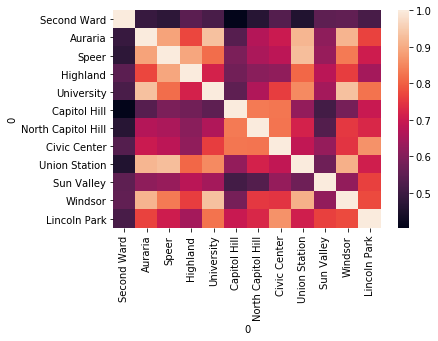

In [133]:
import seaborn as sn
#%pip install ipywidgets
#%jupyter nbextension enable --py widgetsnbextension

def corr_neighborhoods(neighborhoods, onehot_df, neighborhood):
    test = pd.DataFrame()
    for nei in neighborhoods['Neighborhood']:
        test = test.append(pd.DataFrame(onehot_df[onehot_df['Neighborhood']==nei].values))
    test = test.reset_index(drop=True)
    test = test.set_index(0)
    corrMatrix = test.astype(float).T.corr()
    print(corrMatrix.sort_values([neighborhood], ascending = False)[neighborhood])
    sn.heatmap(corrMatrix)
    return corrMatrix

neighborhoods = merged[merged['Cluster Labels']==4]
neighborhood = 'Union Station'
corrMatrix = corr_neighborhoods(neighborhoods, group_clusters, neighborhood)



By analyzing the clusters I've simplified the results below:

Cluster 0 - Restaurants and coffee shops. The vast majority of the city falls in this category. The venues reflect typical metro areas 'city living'.

Cluster 1 - Parks, playgrounds, discount stores and dance studios. Possibly lower income neighborhoods.

Cluster 2 - Golf courses and department stores. Industrial centers with golf courses.

Cluster 3 - Baseball fields and department stores. Industrial centers with baseball fields.

Cluster 4 - Parks, playgrounds, restaurants, and high end stores. Possibly higher income neighborhoods.

Summary: we have scraped a wikipedia page for Toronto neighborhoods and used geopy to attach lat/lon values to each neighborhood. We then made API calls to foursquare.com to locate venues in each neighborhood. From the venue categories we have performed a cluster analysis on the neighborhoods to group them by similar venues. We have then created a map of Toronto with clustered neighborhoods.